In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
data = np.load('/content/QG_jets.npz')

particle_data = data['X']
event_labels = data['y']

num_events, num_particles, num_features = particle_data.shape
particle_data_reshaped = particle_data.reshape(-1, num_features)

df_particles = pd.DataFrame(particle_data_reshaped, columns=['pT', 'Rapidity', 'Phi', 'PDGID'])
# When you reshape the data into a 2D table (where each row represents a single particle),
# you lose the information about which particles belong to which event.
# To fix this, you add an EventID column to track the event for each particle.
df_particles['EventID'] = np.repeat(np.arange(num_events), num_particles)
df_particles = df_particles[df_particles['pT'] != 0]

event_labels_filtered = np.repeat(event_labels, num_particles)[df_particles.index]
df_particles['EventLabel'] = event_labels_filtered
print(df_particles.iloc[36])


pT             0.231359
Rapidity      -1.591922
Phi            0.202907
PDGID         22.000000
EventID        2.000000
EventLabel     1.000000
Name: 279, dtype: float64


<ipython-input-3-7739e3be86f2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_particles['EventLabel'] = event_labels_filtered


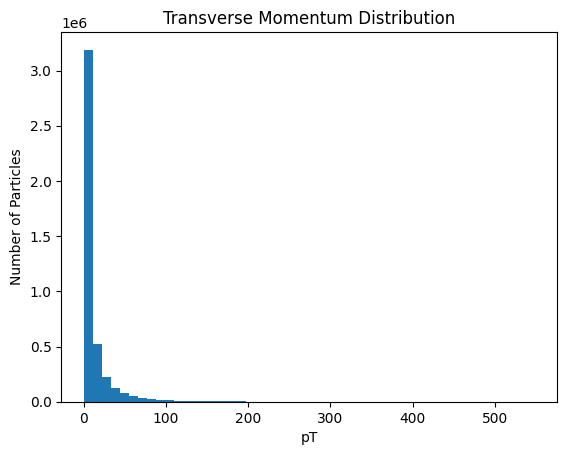

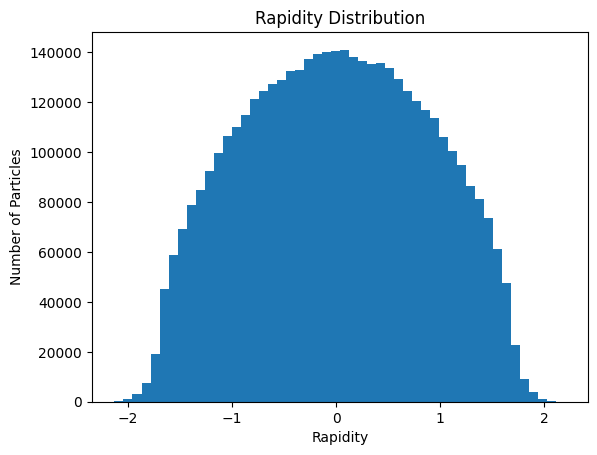

In [ ]:
plt.hist(df_particles['pT'], bins=50)
plt.xlabel('pT')
plt.ylabel('Number of Particles')
plt.title('Transverse Momentum Distribution')
plt.show()

plt.hist(df_particles['Rapidity'], bins=50)
plt.xlabel('Rapidity')
plt.ylabel('Number of Particles')
plt.title('Rapidity Distribution')
plt.show()

In [ ]:
X_for_Split = df_particles[['pT', 'Rapidity', 'Phi', 'PDGID']]
Y_for_Split = df_particles['EventLabel']
X_train, X_test, Y_train, Y_test = train_test_split(X_for_Split, Y_for_Split, test_size=0.2, random_state=3)

In [ ]:
Ran_For = RandomForestClassifier(n_estimators=10, random_state=42)
Ran_For.fit(X_train, Y_train)
Y_pred = Ran_For.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(Y_test, Y_pred))

Accuracy: 0.5868496307353774
              precision    recall  f1-score   support

         0.0       0.63      0.81      0.71    532278
         1.0       0.43      0.24      0.31    333903

    accuracy                           0.59    866181
   macro avg       0.53      0.52      0.51    866181
weighted avg       0.55      0.59      0.55    866181

